## Linear Discriminant Analysis

In [2]:
feature_dict = {i:label for i,label in zip(range(4),
                                           ("sepal length in cm",
                                            "sepal width in cm",
                                            "petal length in cm",
                                            "petal width in cm",))}

In [4]:
import pandas as pd

df = pd.io.parsers.read_csv(filepath_or_buffer="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                           header=None, sep=',',)

df.columns = [l for i,l in sorted(feature_dict.items())]+['class label']
df.dropna(how='all',inplace=True)
df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
from sklearn.preprocessing import LabelEncoder

X=df[feature_dict.values()].values
y=df['class label'].values

enc=LabelEncoder()
label_encoder=enc.fit(y)
y=label_encoder.transform(y)+1

label_dict={1:'Setosa',2:"Versicolor",3:"Virginica"}

In [13]:
import numpy as np
from matplotlib import pyplot as plt

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl],axis=0))
    print("Mean Vector class %s: %s"%(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.006 3.418 1.464 0.244]
Mean Vector class 2: [5.936 2.77  4.26  1.326]
Mean Vector class 3: [6.588 2.974 5.552 2.026]


In [19]:
S_W_1_2 = np.zeros((4,4))
S_W_2_3 = np.zeros((4,4))
S_W_3_1 = np.zeros((4,4))
sc_mats=[]
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for row in X[y==cl]:
        row,mv = row.reshape(4,1), mv.reshape(4,1)
        class_sc_mat += (row-mv).dot((row-mv).T)
    sc_mats.append(class_sc_mat)

S_W12=sc_mats[0]+sc_mats[1]
S_W23=sc_mats[1]+sc_mats[2]
S_W31=sc_mats[2]+sc_mats[0]

print("within-class Scatter Matrix for class 1 and 2\n",S_W12)
print("within-class Scatter Matrix for class 2 and 3\n",S_W23)
print("within-class Scatter Matrix for class 3 and 1\n",S_W31)

within-class Scatter Matrix for class 1 and 2
 [[19.1434  9.0886  9.7528  3.25  ]
 [ 9.0886 11.9388  4.6224  2.5794]
 [ 9.7528  4.6224 12.2952  3.8612]
 [ 3.25    2.5794  3.8612  2.4794]]
within-class Scatter Matrix for class 2 and 3
 [[32.868   8.7684 23.8232  5.1388]
 [ 8.7684  9.9212  7.5476  4.3528]
 [23.8232  7.5476 25.7448  5.9744]
 [ 5.1388  4.3528  5.9744  5.6124]]
within-class Scatter Matrix for class 3 and 1
 [[25.901   9.509  15.652   2.9224]
 [ 9.509  12.21    4.07    2.8942]
 [15.652   4.07   16.4     2.6716]
 [ 2.9224  2.8942  2.6716  4.2594]]


In [39]:
S_B12 = ((mean_vectors[0].reshape(4,1)-mean_vectors[1].reshape(4,1)).dot((mean_vectors[0].reshape(4,1)-mean_vectors[1].reshape(4,1)).T))
S_B23 = ((mean_vectors[1].reshape(4,1)-mean_vectors[2].reshape(4,1)).dot((mean_vectors[1].reshape(4,1)-mean_vectors[2].reshape(4,1)).T))
S_B31 = ((mean_vectors[2].reshape(4,1)-mean_vectors[1].reshape(4,1)).dot((mean_vectors[2].reshape(4,1)-mean_vectors[1].reshape(4,1)).T))

print("between-class Scatter Matrix for classes 1 and 2\n",S_B12)
print("between-class Scatter Matrix for classes 2 and 3\n",S_B23)
print("between-class Scatter Matrix for classes 3 and 1\n",S_B31)

between-class Scatter Matrix for classes 1 and 2
 [[ 0.8649   -0.60264   2.60028   1.00626 ]
 [-0.60264   0.419904 -1.811808 -0.701136]
 [ 2.60028  -1.811808  7.817616  3.025272]
 [ 1.00626  -0.701136  3.025272  1.170724]]
between-class Scatter Matrix for classes 2 and 3
 [[0.425104 0.133008 0.842384 0.4564  ]
 [0.133008 0.041616 0.263568 0.1428  ]
 [0.842384 0.263568 1.669264 0.9044  ]
 [0.4564   0.1428   0.9044   0.49    ]]
between-class Scatter Matrix for classes 3 and 1
 [[0.425104 0.133008 0.842384 0.4564  ]
 [0.133008 0.041616 0.263568 0.1428  ]
 [0.842384 0.263568 1.669264 0.9044  ]
 [0.4564   0.1428   0.9044   0.49    ]]


In [61]:
eig_vals12, eig_vecs12 = np.linalg.eig(np.linalg.inv(S_W12).dot(S_B12))
eig_vals23, eig_vecs23 = np.linalg.eig(np.linalg.inv(S_W23).dot(S_B23))
eig_vals31, eig_vecs31 = np.linalg.eig(np.linalg.inv(S_W31).dot(S_B31))

print("For classes 1 and 2:")
for i in range(len(eig_vals12)):
    eigvec_sc = eig_vecs12[:,i].reshape(4,1)

    print("Eigenvector {}: \n{}".format(i+1, eigvec_sc.real))
    print("Eigenvalue {:}: {:.2e}".format(i+1, eig_vals12[i].real))

print()
print("For classes 2 and 3")
for i in range(len(eig_vals23)):
    eigvec_sc = eig_vecs23[:,i].reshape(4,1)
    print("Eigenvector {}: \n{}".format(i+1, eigvec_sc.real))
    print("Eigenvalue {:}: {:.2e}".format(i+1, eig_vals23[i].real))

print()
print("For classes 3 and 1")
for i in range(len(eig_vals31)):
    eigvec_sc = eig_vecs31[:,i].reshape(4,1)
    print("Eigenvector {}: \n{}".format(i+1, eigvec_sc.real))
    print("Eigenvalue {:}: {:.2e}".format(i+1, eig_vals31[i].real))

For classes 1 and 2:
Eigenvector 1: 
[[-0.93614844]
 [-0.15044621]
 [ 0.17347079]
 [ 0.2662704 ]]
Eigenvalue 1: 0.00e+00
Eigenvector 2: 
[[ 0.06600043]
 [ 0.42695115]
 [-0.49229259]
 [-0.75564851]]
Eigenvalue 2: 1.06e+00
Eigenvector 3: 
[[ 0.24097788]
 [ 0.885798  ]
 [-0.00781608]
 [ 0.34356878]]
Eigenvalue 3: 7.35e-17
Eigenvector 4: 
[[ 0.24097788]
 [ 0.885798  ]
 [-0.00781608]
 [ 0.34356878]]
Eigenvalue 4: 7.35e-17

For classes 2 and 3
Eigenvector 1: 
[[ 0.22684996]
 [ 0.35584988]
 [-0.44461153]
 [-0.79008262]]
Eigenvalue 1: 1.45e-01
Eigenvector 2: 
[[ 0.4309469 ]
 [-0.81474676]
 [ 0.11233127]
 [-0.37128719]]
Eigenvalue 2: 3.14e-17
Eigenvector 3: 
[[-0.21914043]
 [-0.83400987]
 [ 0.40612913]
 [-0.30243038]]
Eigenvalue 3: -1.58e-17
Eigenvector 4: 
[[-0.25943944]
 [ 0.9623864 ]
 [ 0.0211347 ]
 [-0.07782619]]
Eigenvalue 4: 1.55e-17

For classes 3 and 1
Eigenvector 1: 
[[-0.89722599]
 [-0.03136443]
 [ 0.26860466]
 [ 0.34907496]]
Eigenvalue 1: 0.00e+00
Eigenvector 2: 
[[ 0.27758468]
 [ 0.

In [41]:
#A quick check to see if the eigenvector-eigenvalue calculation is correct
for i in range(len(eig_vals12)):
    eigv = eig_vecs12[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W12).dot(S_B12).dot(eigv),
                                        eig_vals12[i]*eigv,
                                        decimal=6, err_msg="", verbose=True)
print("ok")

for i in range(len(eig_vals23)):
    eigv = eig_vecs23[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W23).dot(S_B23).dot(eigv),
                                        eig_vals23[i]*eigv,
                                        decimal=6, err_msg="", verbose=True)
print("ok")

for i in range(len(eig_vals31)):
    eigv = eig_vecs31[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W31).dot(S_B31).dot(eigv),
                                        eig_vals31[i]*eigv,
                                        decimal=6, err_msg="", verbose=True)
print("ok")

ok
ok
ok


In [42]:
eig_pairs12 = [(np.abs(eig_vals12[i]), eig_vecs12[:,i]) for i in range(len(eig_vals12))]
eig_pairs23 = [(np.abs(eig_vals23[i]), eig_vecs23[:,i]) for i in range(len(eig_vals23))]
eig_pairs31 = [(np.abs(eig_vals31[i]), eig_vecs31[:,i]) for i in range(len(eig_vals31))]

eig_pairs12 = sorted(eig_pairs12, key=lambda k: k[0], reverse=True)
eig_pairs23 = sorted(eig_pairs23, key=lambda k: k[0], reverse=True)
eig_pairs31 = sorted(eig_pairs31, key=lambda k: k[0], reverse=True)

print("Eigenvalues for classes 1 and 2 in decreasing order:")
for i in eig_pairs12:
    print(i[0])
    
print("\nEigenvalues for classes 2 and 3 in decreasing order:")
for i in eig_pairs23:
    print(i[0])
    
print("\nEigenvalues for classes 3 and 1 in decreasing order:")
for i in eig_pairs31:
    print(i[0])

Eigenvalues for classes 1 and 2 in decreasing order:
1.0603169361118485
7.665726582215105e-17
7.665726582215105e-17
0.0

Eigenvalues for classes 2 and 3 in decreasing order:
0.1450906715098186
3.1426038898715545e-17
1.581451174998775e-17
1.5541521836398234e-17

Eigenvalues for classes 3 and 1 in decreasing order:
0.201780500740813
1.3277398623856518e-17
6.775526665238578e-18
0.0


In [43]:
print("Variance explained for classes 1 and 2:")
eigv_sum12 = sum(eig_vals12)
for i,j in enumerate(eig_pairs12):
    print("eigenvalue {0:}: {1:.2%}".format(i+1, (j[0]/eigv_sum12).real))
    
print("\nVariance explained for classes 2 and 3:")
eigv_sum23 = sum(eig_vals23)
for i,j in enumerate(eig_pairs23):
    print("eigenvalue {0:}: {1:.2%}".format(i+1, (j[0]/eigv_sum23).real))
    
print("\nVariance explained for classes 3 and 1:")
eigv_sum31 = sum(eig_vals31)
for i,j in enumerate(eig_pairs31):
    print("eigenvalue {0:}: {1:.2%}".format(i+1, (j[0]/eigv_sum31).real))

Variance explained for classes 1 and 2:
eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%

Variance explained for classes 2 and 3:
eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%

Variance explained for classes 3 and 1:
eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


In [48]:
W12=np.hstack((eig_pairs12[0][1].reshape(4,1), eig_pairs12[1][1].reshape(4,1)))
print("Matrix W for classes 1 and 2:\n",W12.real)

W23=np.hstack((eig_pairs23[0][1].reshape(4,1), eig_pairs23[1][1].reshape(4,1)))
print("\nMatrix W for classes 2 and 3:\n",W23.real)

W31=np.hstack((eig_pairs31[0][1].reshape(4,1), eig_pairs31[1][1].reshape(4,1)))
print("\nMatrix W for classes 3 and 1:\n",W31.real)

Matrix W for classes 1 and 2:
 [[ 0.06600043  0.24097788]
 [ 0.42695115  0.885798  ]
 [-0.49229259 -0.00781608]
 [-0.75564851  0.34356878]]

Matrix W for classes 2 and 3:
 [[ 0.22684996  0.4309469 ]
 [ 0.35584988 -0.81474676]
 [-0.44461153  0.11233127]
 [-0.79008262 -0.37128719]]

Matrix W for classes 3 and 1:
 [[ 0.27758468 -0.82635384]
 [ 0.06823772  0.09581552]
 [-0.58438719  0.10684704]
 [-0.75946164  0.54455709]]


In [49]:
X_lda12 = X.dot(W12)
assert X_lda12.shape == (150,2), "The matrix is not 150x2"

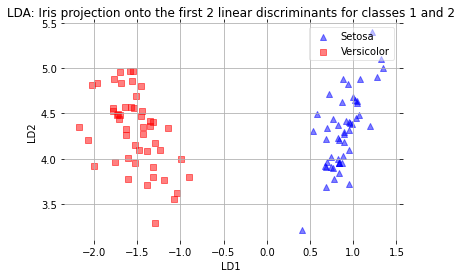

In [60]:
ax=plt.subplot(111)
for label,marker,color in zip([1,2],('^','s'),('blue','red')):
    plt.scatter(x=X_lda12[:,0].real[y==label],
               y=X_lda12[:,1].real[y==label],
               marker=marker,
               color=color,
               alpha=0.5,
               label=label_dict[label]
               )
plt.xlabel('LD1')
plt.ylabel('LD2')

leg = plt.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.title("LDA: Iris projection onto the first 2 linear discriminants for classes 1 and 2")

plt.tick_params(axis='both',which='both',bottom='off',top='off',
               labelbottom='on', left='off', right='off', labelleft='on')

ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)    

plt.grid()
plt.tight_layout
plt.show()

In [54]:
X_lda23 = X.dot(W23)
assert X_lda23.shape == (150,2), "The matrix is not 150x2"

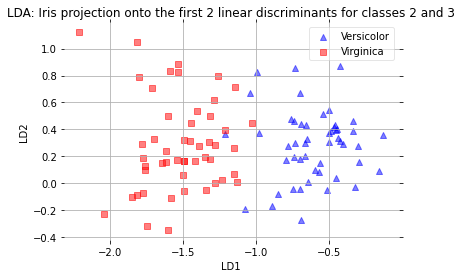

In [59]:
ax=plt.subplot(111)
for label,marker,color in zip([2,3],('^','s'),('blue','red')):
    plt.scatter(x=X_lda23[:,0].real[y==label],
               y=X_lda23[:,1].real[y==label],
               marker=marker,
               color=color,
               alpha=0.5,
               label=label_dict[label]
               )
plt.xlabel('LD1')
plt.ylabel('LD2')

leg = plt.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.title("LDA: Iris projection onto the first 2 linear discriminants for classes 2 and 3")

plt.tick_params(axis='both',which='both',bottom='off',top='off',
               labelbottom='on', left='off', right='off', labelleft='on')

ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)    

plt.grid()
plt.tight_layout
plt.show()

In [57]:
X_lda31 = X.dot(W31)
assert X_lda31.shape == (150,2), "The matrix is not 150x2"

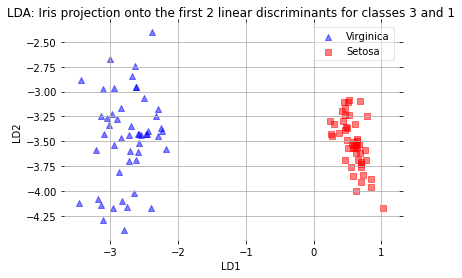

In [58]:
ax=plt.subplot(111)
for label,marker,color in zip([3,1],('^','s'),('blue','red')):
    plt.scatter(x=X_lda31[:,0].real[y==label],
               y=X_lda31[:,1].real[y==label],
               marker=marker,
               color=color,
               alpha=0.5,
               label=label_dict[label]
               )
plt.xlabel('LD1')
plt.ylabel('LD2')

leg = plt.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.title("LDA: Iris projection onto the first 2 linear discriminants for classes 3 and 1")

plt.tick_params(axis='both',which='both',bottom='off',top='off',
               labelbottom='on', left='off', right='off', labelleft='on')

ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)    

plt.grid()
plt.tight_layout
plt.show()

## Logistic Regression

In [303]:
from sklearn.datasets import load_breast_cancer

X= load_breast_cancer()['data']
y=load_breast_cancer()['target']
feature_names=load_breast_cancer()['feature_names']

pd.DataFrame(np.concatenate((X,y[:,None]),axis=1), columns=np.append(feature_names, 'Target'))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [304]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [306]:
import numpy as np
from sklearn.metrics import classification_report

In [307]:
class LogisticRegressionSGD:
    def sigmoid(self, z):
        return 1/(1+np.e**(-z))
    
    def cost_function(self, X, y, w):
        z=np.dot(X, w)
        predict_1 = y*np.log(1-self.sigmoid(z))
        predict_0 = (1-y)*np.log(1-self.sigmoid(z))
        return -sum(predict_1+predict_0)/len(X)
    
    def stochastic_gradient(self, w, xi, yi):
        y_hat = self.sigmoid(np.dot(xi, w))
        g_loss = np.dot(xi.T, y_hat-yi)
        return g_loss 
    
    
    def fit(self, X, y, epochs=25, lr=0.05):
        loss=[]
        w=np.random.rand(X.shape[1])
        N=len(X)
        
        for _ in range(epochs):
            rand_indices=np.random.permutation(N)
            X_rand = X[rand_indices,:]
            y_rand = y[rand_indices]
            
            for i in range(N):
                xi=X_rand[i,:]
                yi=float(y_rand[i])
                g = self.stochastic_gradient(w, xi, yi)
                w-=lr*g
            
            lr *= 0.9
        self.w = w
        self.loss = loss
        
        
    def predict(self, X):
        z=np.dot(X,self.w)
        return [1 if i>0.5 else 0 for i in self.sigmoid(z)]

In [308]:
logregSGD = LogisticRegressionSGD()
logregSGD.fit(X_train,y_train, epochs=500, lr=0.1)
y_predSGD = logregSGD.predict(X_test)

In [309]:
class LogisticRegressionMB_SGD:
    def sigmoid(self, z):
        return 1/(1+np.e**(-z))
    
    def cost_function(self, X, y, w):
        z=np.dot(X, w)
        predict_1 = y*np.log(1-self.sigmoid(z))
        predict_0 = (1-y)*np.log(1-self.sigmoid(z))
        return -sum(predict_1+predict_0)/len(X)
    
    def mb_stochastic_gradient(self, w, xi, yi,b):
        y_hat = self.sigmoid(np.dot(xi, w))
        g_loss = np.dot(xi.T, y_hat-yi)
        return g_loss
    
    
    def fit(self, X, y, b, epochs=25, lr=0.05):
        loss=[]
        w=np.random.rand(X.shape[1])
        N=len(X)
        
        for _ in range(epochs):
            rand_indices=np.random.permutation(N)
            X_rand = X[rand_indices,:]
            y_rand = y[rand_indices].reshape(N,1)
            
            batches=[]
            data = np.hstack((X_rand,y_rand))
            num_batches=data.shape[0]//b
            for i in range(num_batches):
                batch=data[i*b:(i+1)*b,:]
                xb=batch[:,:-1]
                yb=batch[:,-1]
                batches.append((xb,yb))
            
            for batch in batches:
                xi,yi = batch
                g = self.mb_stochastic_gradient(w,xi,yi,b)
                w-=lr*g
            
            lr *= 0.9
        self.w = w
        self.loss = loss
        
        
    def predict(self, X):
        z=np.dot(X,self.w)
        return [1 if i>0.5 else 0 for i in self.sigmoid(z)]

In [310]:
logregMB_SGD = LogisticRegressionMB_SGD()
logregMB_SGD.fit(X_train,y_train,b=64, epochs=500, lr=0.8)
y_predMB_SGD = logregMB_SGD.predict(X_test)

In [311]:
print("Classification Report for SGD logistic Regression:")
print(classification_report(y_test, y_predSGD))
print("\nClassification Report for mini-batch SGD Logistic Regression:")
print(classification_report(y_test, y_predMB_SGD))

Classification Report for SGD logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.99      0.96      0.97       121

    accuracy                           0.97       188
   macro avg       0.96      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188


Classification Report for mini-batch SGD Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.99      0.94      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.96      0.95       188
weighted avg       0.96      0.96      0.96       188



## Probabilistic Generative Model

In [312]:
class ProbabilisticGenerativeModel:
    def __init__(self):
        self.w = None
        self.b = None
        
    def fit(self, x, y):
        self.c0_index = np.where(y==0)[0]
        self.c1_index = np.where(y==1)[0]
        
        self.c0_x = x[self.c0_index, :]
        self.c1_x = x[self.c1_index, :]
        
        self.c0_mean = np.mean(self.c0_x, axis=0)
        self.c1_mean = np.mean(self.c1_x, axis=0)
        
        self.c0_pri_prob = len(self.c0_index) / (len(self.c0_index) + len(self.c1_index))
        self.c1_pri_prob = 1 - self.c0_pri_prob

        self.covariance = (np.cov(self.c0_x, rowvar=False)*self.c0_pri_prob) + (np.cov(self.c1_x, rowvar=False)*self.c1_pri_prob)
        self.covariance_inv = np.linalg.pinv(self.covariance)

        self.w = np.dot((self.c0_mean - self.c1_mean).T, self.covariance_inv)
        self.b = - 0.5 * np.dot( np.dot(self.c0_mean.T, self.covariance_inv), self.c0_mean ) \
                 + 0.5 * np.dot( np.dot(self.c1_mean.T, self.covariance_inv), self.c1_mean ) \
                 + np.log((len(self.c0_index)/len(self.c1_index)))

        return self.w, self.b
    
    def sigmoid(self, z):
        z_p = 1 / (1.0 + np.exp(-z))
        return np.clip(z_p, 1e-8, 1 - (1e-8))

    def predict(self, x, w, b):
        return np.where(self.sigmoid(np.dot(x, w) + b) > 0.5, 0, 1)

In [313]:
PGM = ProbabilisticGenerativeModel()
w,b = PGM.fit(X_train, y_train)
y_predPGM = PGM.predict(X_test,w,b)

In [314]:
print("\nClassification Report for Probabilistic Generative Model:")
print(classification_report(y_test, y_predPGM))


Classification Report for Probabilistic Generative Model:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        67
           1       0.94      0.98      0.96       121

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188

